In [170]:
import matplotlib
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from numpy.linalg import inv
from scipy.linalg import circulant

In [372]:
def mySVD2dconv(img,filt):
    U, S , V = np.linalg.svd(filt,full_matrices=False)
    print(S)
    V = V.T
    N = img.shape[0]
    L = filt.shape[0]
    img_1 = np.zeros(shape=(N+L-1,N+L-1))
    for i in range(L):
        U1 = np.zeros(shape=(N+L-1,N))
        V1 = np.zeros(shape=(N+L-1,N))
        #print(i)
        U1[0:L,0] = U[:,i]
        V1[0:L,0] = V[:,i]
        U1 = (circulant(np.transpose(U1[:,0])))
        V1 = (circulant(np.transpose(V1[:,0])))
        U1 = U1[:,0:N]
        V1 = V1[:,0:N]
        #print(U1)
        #print(U1.shape,img.shape,V1.shape)
        img_1 = img_1 + (S[i]) * np.dot(np.dot(U1,img),V1.T)
        
    print(img_1.max())
    print(img_1.min())
    #print(V1)
    return np.asarray(img_1,dtype=np.unsignedinteger)

#mySVD2dconv(np.array([1]),np.random.randn(3, 3)) 

Original Image


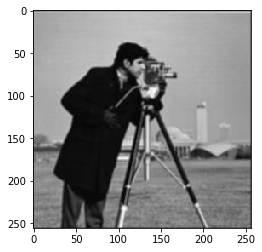

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]
0.0
[  8.19615242e+00   2.19615242e+00   5.51959979e-17]
447.0
-334.0
(256, 256)


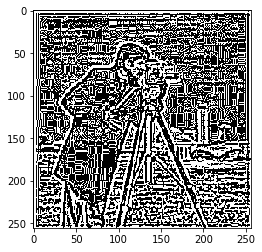

In [373]:
img = misc.imread('cameraman.jpg',mode="L")
print("Original Image")
plt.imshow(img)
plt.gray()
plt.show()
#filt = (1/9) * np.ones((3,3))
filt = np.array([[1 , 1 , 1] , [1, -8, 1] , [1 , 1 , 1]])
print(filt)
print(np.linalg.det(filt))
img1 = mySVD2dconv(img,filt)
img1 = img1[0:img.shape[0],0:img.shape[1]]
print(img1.shape)
plt.imshow(img1)
plt.show()